In [11]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

target_shape = (64, 64)

interpreter = tf.lite.Interpreter(f"./quickdraw-{target_shape[0]}.tflite")
interpreter.allocate_tensors()

loc = os.path.join(os.path.expanduser('~'), f"scratch/{target_shape[0]}-pre-quickdraw")
filenames = sorted(os.listdir(loc))

In [19]:
category = "alarm clock"
file = os.path.join(loc, f"{category}.npy")

images = np.load(file)

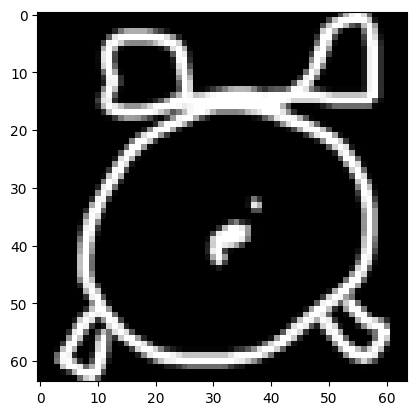

In [21]:
image_index = 5

image = images[image_index]

plt.imshow(image, cmap="gray");

In [22]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], images[image_index].reshape(1, target_shape[0], target_shape[1], 1).astype(np.float32))
interpreter.invoke()

predictions = interpreter.get_tensor(output_details[0]['index'])[0]

print("Top 3 predictions")
print({x : pred for (x, pred) in sorted(zip(filenames, predictions), key=lambda x: -x[1])[:3]})

Top 3 predictions
{'alarm clock.npy': 0.99856323, 'bear.npy': 0.0012736343, 'sea turtle.npy': 0.0001358249}
